***Проект*** Вытиснение нефти полимером

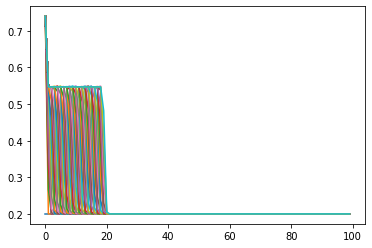

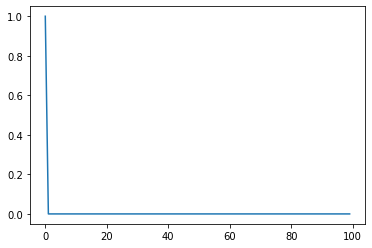

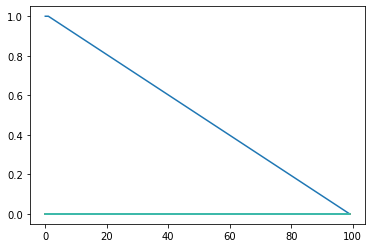

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
from math import fabs
s0 = 0.2
tau = 0.0002
h = 0.01
m = 1
mu2=20
def mu1(c):
    return (1 + 5 * c)
def mu(c):
    return 20 / (1 + 5 * c)
def f1(s):
    return ((s - 0.2) / 0.81) ** 3
def f2(s):
    return (((0.74 - s) / 0.715) ** 3)
def fi(s,c):
    return mu(c) * f1(s) / (f1(s) + mu(c) * f2(s))
n1=100
n2=100
s=np.zeros((n1,n2))
c=np.zeros(n1)
a=np.zeros((n1,n2))
alfa=np.zeros((n1,n2))
beta=np.zeros((n1,n2))
p=np.zeros((n1,n2))
p[n1-1] = 0
p[0, 0]=1
alfa[0, 0]=1
beta[0, 0]=1

for i in range(n1):
    s[i,0]=s0
    c[i]=0
for j in range(n2-1):
    s[0,j+1]=0.74
    c[0]=1
    for i in range(n1-1):
        a[i+1, j]=(1 / mu1(c[i])) * f1(0.5 * (s[i,j] + s[i+1,j]))+(1 / mu2) * f2(0.5 * (s[i,j] + s[i+1,j]))
    for i in range(1,n1-2):
        alfa[i,j]=(a[i,j] * alfa[i-1,j]) / (a[i+1,j] + a[i,j] * alfa[i-1,j])
        beta[i,j]=(a[i,j] * beta[i-1,j]) / (a[i+1,j] + a[i,j] * beta[i-1,j])
    for i in range(n1-2,0,-1):
        p[i,j]=(1 - alfa[i-1,j]) * p[i+1,j] + beta[i-1,j]
    q=((-1) * a[n1-1,j] * (p[n1-1,j] - p[n1-2,j])) / h
    for i in range(1,n1):
        s[i,j + 1] = s[i,j] - (tau * (fi(s[i,j],c[i]) - fi(s[i-1,j],c[i-1]))) / (h * m)
        c[i] = ((s[i,j] * c[i] + 0.1 * c[i] / m)+(-q*(fi(s[i,j],c[i]) * c[i] - fi(s[i-1,j],c[i-1]) * c[i-1]))*tau/(m*h)) / (s[i,j + 1]+0.1/m)
plt.plot(s)
plt.show()

plt.plot(c)
plt.show()

plt.plot(p)
plt.show()

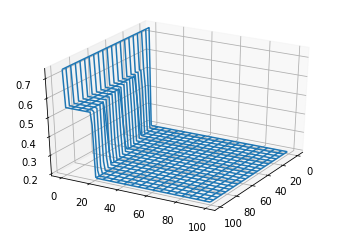

In [ ]:
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np
from mpl_toolkits.mplot3d import axes3d

X = np.arange(0, 100, 1)
Y = np.arange(0, 100, 1)
X, Y = np.meshgrid(X, Y)
Z = s
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(X, Y, Z, rstride=5, cstride=5)

plt.draw()
ax.view_init(30, 30)

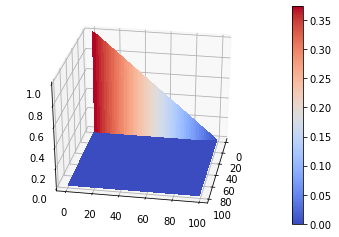

In [ ]:
X = np.arange(0, 100, 1)
Y = np.arange(0, 100, 1)
X, Y = np.meshgrid(X, Y)
Z = p

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.view_init(30, 10)
fig.colorbar(surf)
plt.show()